<a href="https://colab.research.google.com/github/AkashBhardwaj9078/Demo_git_work/blob/main/fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau



In [ ]:
(xtr,ytr),(xts,yts)=fashion_mnist.load_data()

In [ ]:
print("training input data shape:",xtr.shape)
print("testing input data shape:",xts.shape)
print("training output data shape:",ytr.shape)
print("testing output data shape:",yts.shape)

training input data shape: (60000, 28, 28)
testing input data shape: (10000, 28, 28)
training output data shape: (60000,)
testing output data shape: (10000,)


In [ ]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

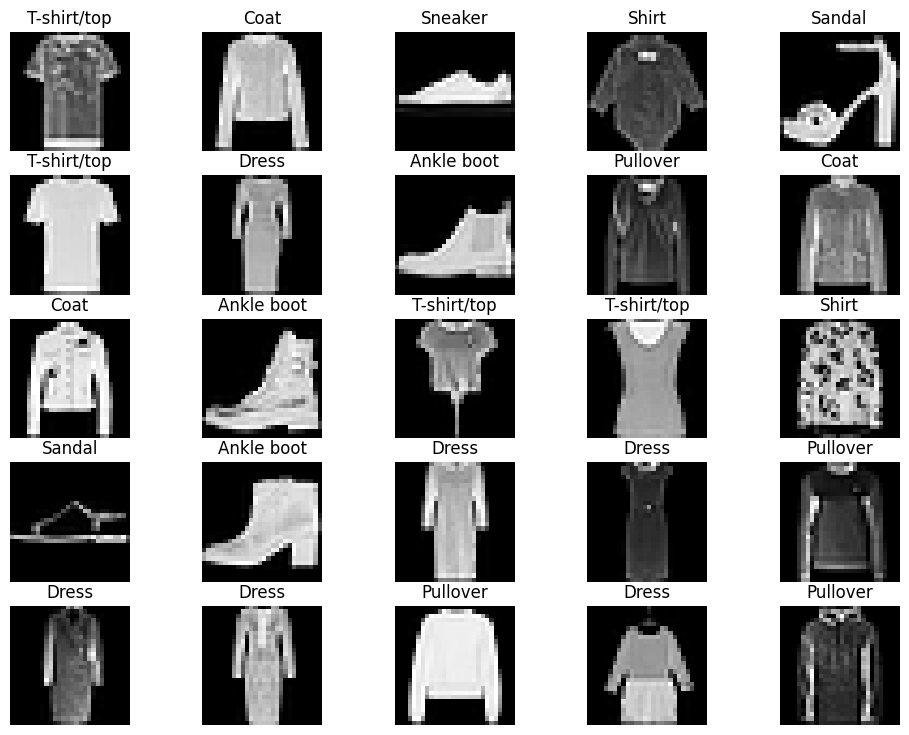

In [ ]:
plt.figure(figsize=(12,9))
for i in range(25):
  plt.subplot(5,5,i+1)
  idx=np.random.randint(0,len(xtr))
  plt.imshow(xtr[idx],cmap="gray")
  plt.title(classes[ytr[idx]])
  plt.axis("off")

In [ ]:
xtr=np.expand_dims(xtr,-1)
xts=np.expand_dims(xts,-1)


xtr=xtr.astype("float32")/255.0
xts=xts.astype("float32")/255.0


ytr_cat=to_categorical(ytr)
yts_cat=to_categorical(yts)

print(xtr.shape,xts.shape)
print(ytr_cat.shape,yts_cat.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale = 1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')




In [ ]:
train_data=train_datagen.flow(
    xtr,ytr_cat,
    batch_size=32,
    shuffle=True,
    seed=42,

)

In [ ]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0.2,
    shear_range=0.2,

)

test_data=test_datagen.flow(
    xts,yts_cat,
    batch_size=128,
    shuffle=True,
    seed=43
)

In [ ]:



early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1,mode="auto")

model_checkpoint = ModelCheckpoint("/content/norm.h5", monitor="val_loss",mode="auto",)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)


In [ ]:


model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=L2(l2=0.02),input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=L2(l2=0.02)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128,activation='relu',kernel_regularizer=L2(l2=0.02)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.01,momentum=0.9,nesterov=False),metrics=['accuracy'])
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 11, 11, 64)       

In [ ]:
history=model.fit(xtr,ytr_cat,epochs=20,validation_data=(xts,yts_cat),  callbacks=[early_stopping, model_checkpoint, reduce_lr_on_plateau],batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 80s 42ms/step - loss: 1.4597 - accuracy: 0.7770 - val_loss: 1.4215 - val_accuracy: 0.7186 - lr: 0.0100
Epoch 2/20
   3/1875 [..............................] - ETA: 1:01 - loss: 1.1142 - accuracy: 0.7917

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 75s 40ms/step - loss: 1.0437 - accuracy: 0.7843 - val_loss: 1.2216 - val_accuracy: 0.7381 - lr: 0.0100
Epoch 3/20
1875/1875 [==============================] - 76s 40ms/step - loss: 1.0307 - accuracy: 0.7903 - val_loss: 1.0336 - val_accuracy: 0.7913 - lr: 0.0100
Epoch 4/20
1875/1875 [==============================] - 75s 40ms/step - loss: 1.0263 - accuracy: 0.7864 - val_loss: 1.3301 - val_accuracy: 0.6853 - lr: 0.0100
Epoch 5/20
1875/1875 [==============================] - 78s 42ms/step - loss: 1.0023 - accuracy: 0.7814 - val_loss: 0.9854 - val_accuracy: 0.7942 - lr: 0.0100
Epoch 6/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.9871 - accuracy: 0.7824 - val_loss: 0.9027 - val_accuracy: 0.7911 - lr: 0.0100
Epoch 7/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.9846 - accuracy: 0.7849 - val_loss: 0.9613 - val_accuracy: 0.7957 - lr: 0.0100
Epoch 8/20
1875/1875 [==============================] - 7

In [ ]:


from tensorflow.keras.metrics import Precision, Recall, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

precision = Precision()
recall = Recall()
true_positives = TruePositives()
true_negatives = TrueNegatives()
false_positives = FalsePositives()
false_negatives = FalseNegatives()

metrics=[precision,recall,true_positives,true_negatives,false_positives,false_negatives]


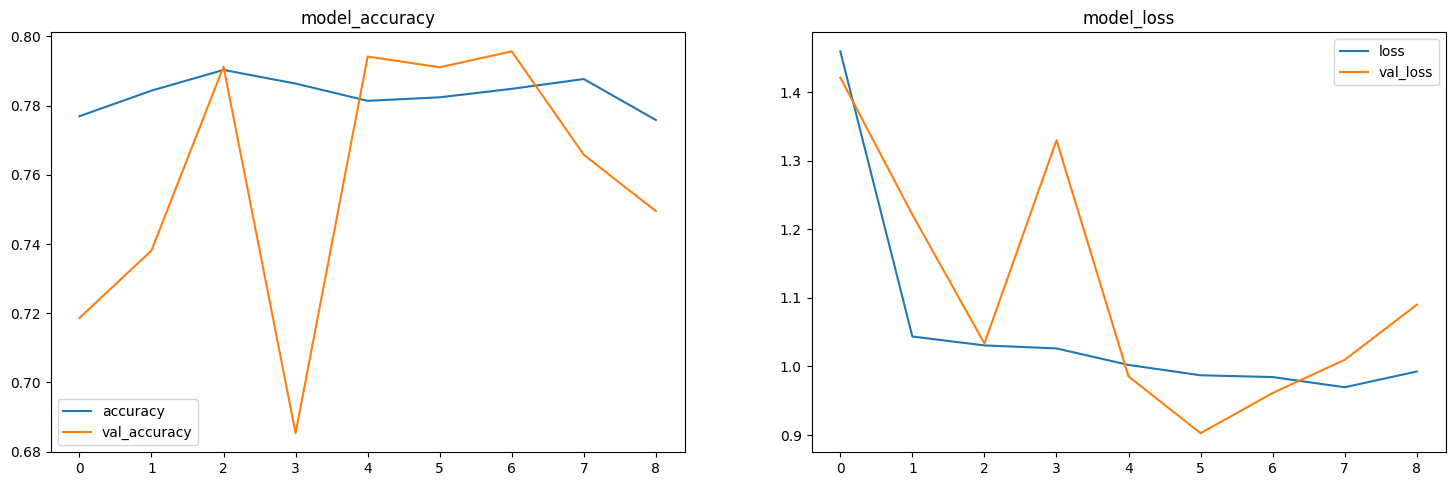

In [ ]:
hist=history


plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.title("model_accuracy")
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.legend()




plt.subplot(2,2,2)
plt.title("model_loss")
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()

In [ ]:
score=model.evaluate(xts,yts_cat,verbose=1)
print("test_loss:",score[0])
print("test_accuracy:",score[1])

313/313 [==============================] - 6s 19ms/step - loss: 1.0900 - accuracy: 0.7495
test_loss: 1.0900424718856812
test_accuracy: 0.7494999766349792


In [ ]:
prediction=model.predict(xts)
pred=np.argmax(prediction,axis=-1)


313/313 [==============================] - 3s 9ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_true=yts
print(confusion_matrix(y_true,pred))

print("\n")

print(classification_report(y_true,pred))

[[711   0  31  28   4   1 202   0  23   0]
 [  1 903   1  46   4   0  42   0   3   0]
 [ 13   0 775   3 108   0  88   0  13   0]
 [ 26   5  60 725  22   0 160   0   2   0]
 [  0   0 160  11 637   0 186   0   6   0]
 [  0   3   0   6   0 614   7 342  16  12]
 [134   0 155  14 122   0 540   0  35   0]
 [  0   0   0   0   0   0   0 998   0   2]
 [  4   1   5   4   2   0  15   7 962   0]
 [  0   1   0   1   0   1   1 364   2 630]]


              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1000
           1       0.99      0.90      0.94      1000
           2       0.65      0.78      0.71      1000
           3       0.87      0.72      0.79      1000
           4       0.71      0.64      0.67      1000
           5       1.00      0.61      0.76      1000
           6       0.44      0.54      0.48      1000
           7       0.58      1.00      0.74      1000
           8       0.91      0.96      0.93      1000
           9       0.98   

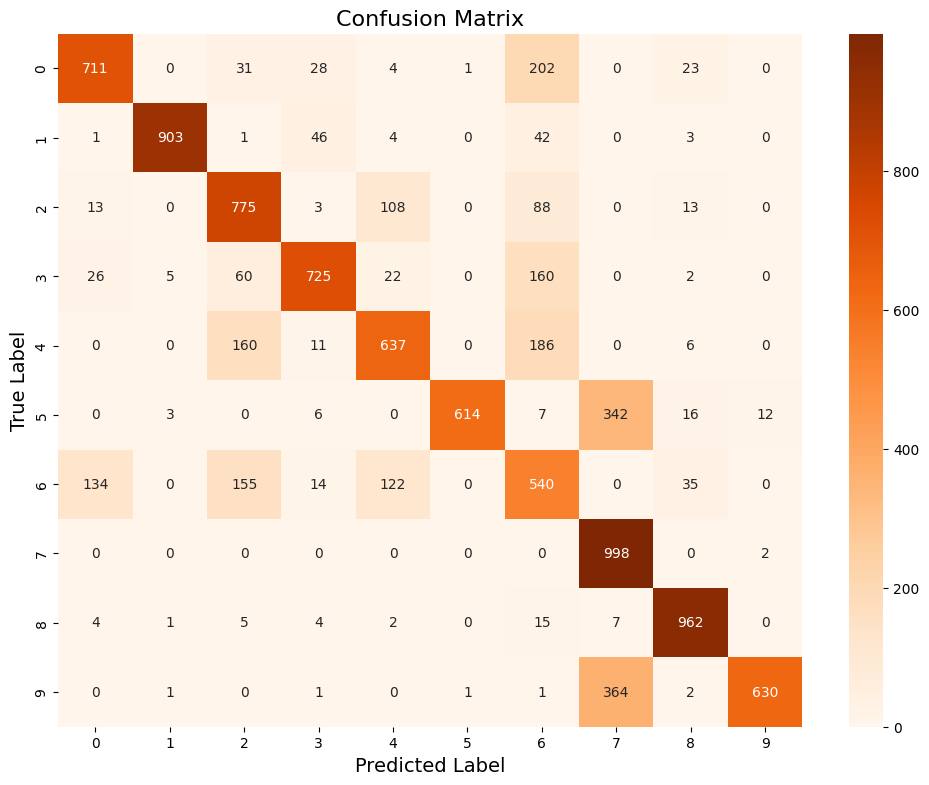

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, pred)

cm_df = pd.DataFrame(cm, columns=np.unique(y_true), index=np.unique(y_true))

plt.figure(figsize=(12, 9))
sns.heatmap(cm_df, annot=True, fmt=".0f", cmap="Oranges")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

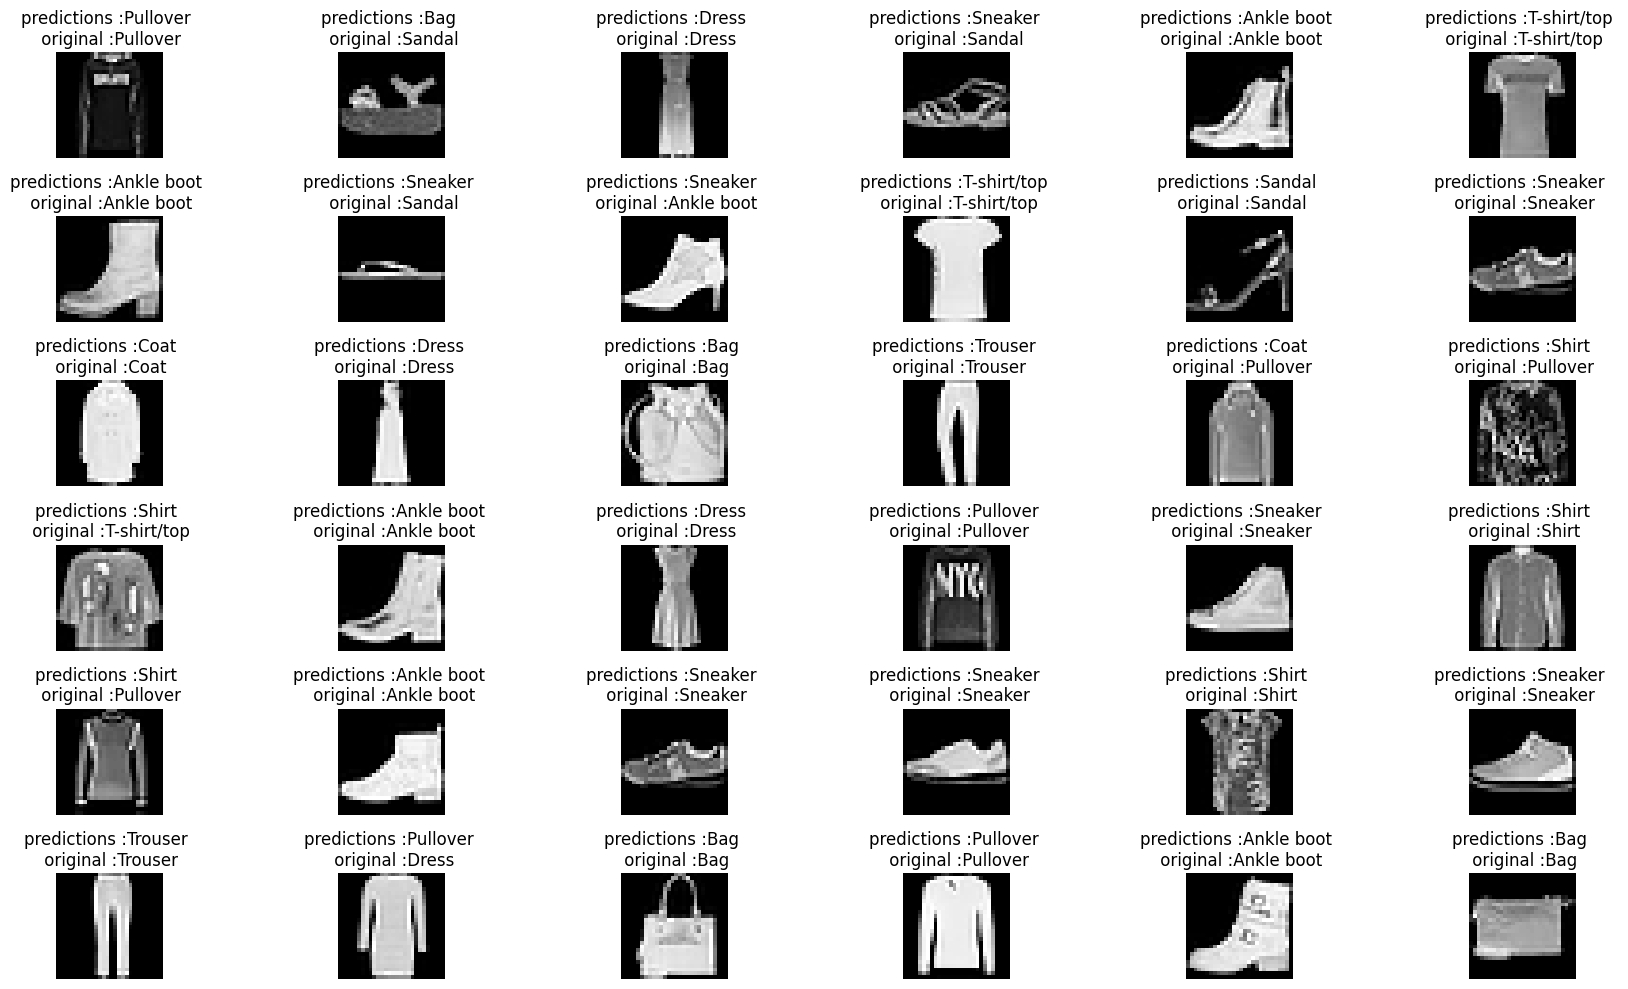

In [ ]:
fig,axes=plt.subplots(6,6,figsize=(18,10))
axes=axes.ravel()
for i in range(36):
  idx=np.random.randint(0,len(xts))

  axes[i].imshow(xts[idx],cmap="gray")
  axes[i].set_title(f"predictions :{classes[pred[idx]]} \n original :{classes[y_true[idx]]}")
  axes[i].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
class conv_block:
    def __init__(self, filters, kernel_size, padding="same", activation="relu"):
        super(conv_block, self).__init__()
        self.conv_1 = Conv2D(filters, kernel_size, padding=padding, activation=activation)
        self.conv_2 = Conv2D(2*filters+4, kernel_size, padding=padding, activation=activation)
        self.pool = MaxPooling2D(pool_size=(2, 2))
        self.drop = Dropout(0.2)
        self.bn1 = BatchNormalization()
        self.bn2 = BatchNormalization()

    def call(self, x):
        x = self.conv_1(x)
        x = self.bn1(x)
        x = self.drop(x)
        x = self.conv_2(x)
        x = self.bn2(x)
        x = self.drop(x)
        x = self.pool(x) # Added the pooling layer to the call method
        return x

In [ ]:
layer=conv_block(6,3)
input_tensor = tf.keras.Input(shape=(28,28,1)) # Define input with correct shape
x=layer.call(input_tensor)  # Pass the input tensor to the layer
x=Flatten()(x)
x=Dense(128,activation="relu")(x)
x=Dense(64,activation="relu")(x)
x=Dense(10,activation="softmax")(x)

mod=tf.keras.Model(inputs=input_tensor,outputs=x) # Use the same input tensor
mod.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 28, 28, 6)            60        ['input_14[0][0]']            
                                                                                                  
 batch_normalization_25 (Ba  (None, 28, 28, 6)            24        ['conv2d_23[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 dropout_16 (Dropout)        multiple                     0         ['batch_normalization_25

In [ ]:
mod.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=metrics
)

In [ ]:
mod.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 28, 28, 6)            60        ['input_14[0][0]']            
                                                                                                  
 batch_normalization_25 (Ba  (None, 28, 28, 6)            24        ['conv2d_23[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 dropout_16 (Dropout)        multiple                     0         ['batch_normalization_25

In [ ]:
history=mod.fit(
    xtr,ytr_cat,
    batch_size=32,
    epochs=10,
    validation_data=(xts,yts_cat)
)

Epoch 1/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.3721 - precision_2: 0.8917 - recall_2: 0.8439 - true_positives_2: 50633.0000 - true_negatives_2: 533852.0000 - false_positives_2: 6148.0000 - false_negatives_2: 9367.0000 - val_loss: 0.4067 - val_precision_2: 0.8761 - val_recall_2: 0.8525 - val_true_positives_2: 8525.0000 - val_true_negatives_2: 88794.0000 - val_false_positives_2: 1206.0000 - val_false_negatives_2: 1475.0000
Epoch 2/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2763 - precision_2: 0.9150 - recall_2: 0.8832 - true_positives_2: 52993.0000 - true_negatives_2: 535076.0000 - false_positives_2: 4924.0000 - false_negatives_2: 7007.0000 - val_loss: 0.3900 - val_precision_2: 0.8799 - val_recall_2: 0.8627 - val_true_positives_2: 8627.0000 - val_true_negatives_2: 88822.0000 - val_false_positives_2: 1178.0000 - val_false_negatives_2: 1373.0000
Epoch 3/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.237

In [ ]:

from tensorflow.keras.layers import MaxPool2D,BatchNormalization
from tensorflow.keras.op
lenet_mod=tf.keras.Sequential()

lenet_mod.add(Conv2D(6,(5,5),input_shape=(256,256,3),activation="relu",padding="same"))
lenet_mod.add(BatchNormalization()),
lenet_mod.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="valid"))


lenet_mod.add(Conv2D(16,(5,5),activation="relu",padding="same"))
lenet_mod.add(BatchNormalization()),
lenet_mod.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="valid"))

lenet_mod.add(Flatten())
lenet_mod.add(Dense(120,activation="relu"))
lenet_mod.add(Dense(84,activation="relu"))
lenet_mod.add(Dense(2,activation="softmax"))

lenet_mod.compile(optimizer = tf.keras.opAdam(learning_rate =0.001),
      loss = "categorical_crossentropy",
      metrics = metrics)
hist_model=lenet_mod.fit(ds_train,validation_data=ds_test ,epochs=10)


NameError: name 'Adam' is not defined